# Real-time carbon accounting and material transition for hydrogen systems

__author__ = "Marco De Sousa"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Marco De Sousa", "Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Marco De Sousa"
__email__ = "marcopdsousa@tamu.edu"
__status__ = "Production"


## Problem Statement

The following case study considers three different type of solar photovoltaics, namely Monocrystalline (PV_Mo), Polycrystalline (PV_Po), and Cadmium Telluride (PV_Cd) and  Lithium-ion batteries made of either rock-based lithium (LiI_Ro) or brine-based lithium (LiI_Br).

The goal is to meet a fixed demand of hydrogen on a daily scale while optimizing the production process by using forecasting techniques.

It is important to note that three different hydrogen pathways can be utilized each with their respective emissions.

Hypothesis: By using real-time carbon accounting, decisions and changes can be made in a more dynamic nature.

Users are advised caution in terms of assigning the emissions at the appropriate levels and avoiding double account. For example, if providing the global warming potentials (GWP) for each individual material to make up a process, the GWP for processes should only consider the values for construction. Moreover, the direct emissions are considered through the resource balance constraint.

## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t

$\mathcal{B}$ - set of transport modes b

$\mathcal{L}$ - set of locations l

$\mathcal{M}$ - set of materials m

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Mat^P_{l,p,m,t}$ - material m $\in$ $\mathcal{M}$ used by process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Em^{p/r/m}_{l,p/r/m,t}$ - emission from process/resource/material in time t $\in$ $\mathcal{T}^{net}$


*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

$Mat^{cons}_{p,m}$ - material m $\in$ $\mathcal{M}$ consumed by process p $\in$ $\mathcal{P}$

$GWP^{p/r/m}_{l,p/r/m,t}$ - global warming indicators for process/resource/material in time t $\in$ $\mathcal{T}^{net}$


## MILP Formulation

Given is a mulit-scale modeling and optimization MILP framework for the simultaneous design and schedule planning of a single location energy system 

\begin{equation}
min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} (\alpha \times Capex_{l,p,t} + Fopex_{l,p,t}) \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
+ \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
- S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
\sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} +  Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
\forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
Mat_{l,p,m,t} = Mat^{cons}_{p,m} \times Cap^P_{l,p,t} \hspace{1cm} \forall m \in \mathcal{M}, p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{r}_{l,r,t} = GWP^{r}_{l,r,t} \times C_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
Em^{m}_{l,m,t} = GWP^{m}_{l,m,t} \times \sum_{p \in \mathcal{P}} Mat_{l,p,m,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{p}_{l,p,t} = GWP^{p}_{l,p,t} \times Cap_{l,p,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Mat_{l,p,m,t}, Em^{p/r/m}_{l,p/r/m,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [2]:
import sys
sys.path.append('../src')

In [3]:
import pandas as pd
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource, Scope
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product
from energiapy.components.result import Result
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.components.location import Location
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.model.constraints.integer_cuts import constraint_block_integer_cut, constraint_block_integer_cut_min
from scipy import stats

## Data Import

In [4]:
horizon = 3

The following data is needed for the model

- Daily demands of hydrogen.
- The capacity factor of renewable energy sources and traditional grid power.


**Declare temporal scale**

The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.



In [5]:
scales = TemporalScale(discretization_list=[3, 365, 24])

## Declare resources

Resources can be consumed, produced, stored, discharged (or sold).

Power demand follows a varying deterministic demand

In [6]:
bigM = 10**6
smallM = 0.001

Historical Data for Design - Hourly Electricity Pricing

In [7]:
# Read and process 2021 data
edf1 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical electricity prices/2021 Historical electricity prices.xlsx", sheet_name=None)
edf1 = pd.concat(edf1.values(), ignore_index=True)
edf1 = edf1[edf1['Settlement Point'] == 'HB_HOUSTON']['Settlement Point Price'].reset_index(drop = True)

# Read and process 2022 data
edf2 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical electricity prices/2022 Historical electricity prices.xlsx", sheet_name=None)
edf2 = pd.concat(edf2.values(), ignore_index=True)
edf2 = edf2[edf2['Settlement Point'] == 'HB_HOUSTON']['Settlement Point Price'].reset_index(drop = True)

# Read and process 2023 data
edf3 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical electricity prices/2023 Historical electricity prices.xlsx", sheet_name=None)
edf3 = pd.concat(edf3.values(), ignore_index=True)
edf3 = edf3[edf3['Settlement Point'] == 'HB_HOUSTON']['Settlement Point Price'].reset_index(drop = True)

# Combine the data from all years
ecombined_df = pd.concat([edf1, edf2, edf3]).reset_index(drop = True)
#ecombined_df = ecombined_df.reset_index(drop = True)
#ecombined_df

ecombined_df = pd.DataFrame(ecombined_df)

# Calculate the mean and standard deviation
mean = ecombined_df.mean()
std = ecombined_df.std()


outliers = numpy.abs(ecombined_df - mean) > 2 * std
# Prune outliers beyond 3 standard deviations
ecombined_df = ecombined_df.mask(outliers)
fill_value = ecombined_df.mean()
ecombined_df = ecombined_df.fillna(fill_value)
ecombined_df

# Get the maximum value from the combined data
#combined = ecombined_df.max()

# Output the maximum value
#print(ecombined)

,Settlement Point Price
0,18.30
1,17.65
2,17.07
3,17.19
4,17.24
...,...
26275,19.29
26276,16.57
26277,14.47
26278,15.50


Historical Data for Design - Hourly Wind Availability

In [8]:
wfdf1 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2021 Wind and Solar data.xlsx", sheet_name='Wind Data')  # None reads all sheets
wfdf1 = wfdf1['ERCOT.WIND.GEN']

wfdf2 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2022 Wind and Solar data.xlsx", sheet_name='Wind Data')  # None reads all sheets
wfdf2 = wfdf2['ERCOT.WIND.GEN']

wfdf3 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2023 Wind and Solar data.xlsx", sheet_name='Wind Data')  # None reads all sheets
wfdf3 = wfdf3['ERCOT.WIND.GEN']
wfdf3

wfcombined_df = pd.concat([wfdf1, wfdf2, wfdf3], axis=0)  # axis=0 means row-wise (default)
wfcombined_df = pd.DataFrame(wfcombined_df)



Historical Data for Design - Hourly Solar Availability

In [9]:
sfdf1 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2021 Wind and Solar data.xlsx", sheet_name='Solar Data')  # None reads all sheets
sfdf1 = sfdf1['ERCOT.PVGR.GEN']

sfdf2 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2022 Wind and Solar data.xlsx", sheet_name='Solar Data')  # None reads all sheets
sfdf2 = sfdf2['ERCOT.PVGR.GEN']

sfdf3 = pd.read_excel("C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical Renewable availability/2023 Wind and Solar data.xlsx", sheet_name='Solar Data')  # None reads all sheets
sfdf3 = sfdf3['ERCOT.PVGR.GEN']
sfdf3

sfcombined_df = pd.concat([sfdf1, sfdf2, sfdf3], axis=0)  # axis=0 means row-wise (default)
sfcombined_df = pd.DataFrame(sfcombined_df)

Hourly Natural Gas Prices

In [10]:
#The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
NG_price_df = pd.read_csv('C:/Users/marcopdsousa/Documents/energiapy/AICHE/Historical natural gas prices/Natural gas historical data.csv')
NG_price_df = NG_price_df[['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']]
# NG_price_df = NG_price_df[:24]
NG_price_df
NG_price_hourly = NG_price_df.reindex(NG_price_df.index.repeat(30))
NG_price_hourly = NG_price_hourly[:26280]
NG_price_hourly
NG_price_hourly = pd.DataFrame(NG_price_hourly)

mean = NG_price_hourly.mean()
std = NG_price_hourly.std()


outliers = numpy.abs(NG_price_hourly - mean) > 3 * std
# Prune outliers beyond 3 standard deviations
NG_price_hourly = NG_price_hourly.mask(outliers)
fill_value = NG_price_hourly.mean()
NG_price_hourly = NG_price_hourly.fillna(fill_value)
NG_price_hourly


,Henry Hub Natural Gas Spot Price (Dollars per Million Btu)
0,2.39
0,2.39
0,2.39
0,2.39
0,2.39
...,...
875,2.45
875,2.45
875,2.45
875,2.45


In [11]:
#Gives relevancy to price values again
ecombined = ecombined_df.max()
wfcombined = wfcombined_df.max()
sfcombined = sfcombined_df.max()

## Declare Resources

In [12]:
Solar = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power', price= 52.69, gwp=0, scope=Scope.TWO)

Wind = Resource(name='Wind', cons_max=bigM, basis='MW', label='Wind Power', price= 60.11, gwp=0, scope=Scope.TWO)

Power = Resource(name='Power', basis='MW',
                 label='Power generated')

GridPower = Resource(name='GridPower', basis='MW',
                     cons_max=bigM, label='Power bought', gwp=420.62, price = ecombined, varying = [VaryingResource.DETERMINISTIC_PRICE], scope = Scope.TWO)

#The following are components of natural gas

CO2 = Resource(name='CO2', basis='kg/hr',
               label='Carbon dioxide', block='Resource')

CO2_Stack = Resource(name='CO2 to Stack', basis='kg/hr', sell=True,
               label='Carbon dioxide to Stack', block='Resource', gwp = 1, scope = Scope.ONE)

CO2_Air = Resource(name='CO2 from air', basis='kg/hr',
               label='Carbon dioxide from air', block='Resource', cons_max=bigM)

CO2_Vent = Resource(name='CO2 Vented from the process', basis='kg/hr',
               label='Carbon dioxide vented from the process', block='Resource', gwp = 1, sell=True, scope = Scope.ONE)

CO2cpt = Resource(name='CO2 Captured', basis='kg/hr', sell=True, label='Captured carbon dioxide', block='Resource')

#CO2_Blowdown= Resource(name='CO2 Blowdown', basis='kg/hr', sell=True, block='Resource', gwp = 1) # 2 ATR processes, imp, Stream X+20, 16+20 Declares CO2 going into the Boiler via Air stream 5 in ATR process

CH4 = Resource(name='CH4', basis='kg/hr',
               label='Methane', block='Resource')

CH4_Desorped = Resource(name='CH4_Desorped', basis='kg/hr',
               label='Methane', block='Resource') # True for ATR Occurs during ATR process

#Important: Natural gas consists over different components

NG = Resource(name='Natural Gas', basis='kg/hr',
                     cons_max=bigM, label='Natural Gas', gwp = 0.660979, price = NG_price_hourly, varying = [VaryingResource.DETERMINISTIC_PRICE])


# Hydrogen is what I want to sell/satisfy a specific demand for

H2 = Resource(name='Hydrogen', basis='kg/hr', label='Hydrogen', block='Resource')

H2Pure = Resource(name='Pure Hydrogen', demand = True, basis='kg/hr', label='Pure Hydrogen', block='Resource')

# Water is required for the electrolysis process

H2O = Resource(name='H2O',
               basis='kg/hr', cons_max=bigM, label='Water', block='Resource')

#Industrial water price is 0.002 USD/kg of water
H2OFresh = Resource(name="H2O Fresh", cons_max=bigM, price = 0.002, basis='kg/hr', label='Fresh Water', block='Resource')

H2O_Air = Resource(name='H2O from air', cons_max=bigM,
               basis='kg/hr', label='Water from air', block='Resource')

H2O_Vent = Resource(name='H2O vented from the process',
               basis='kg/hr', sell=True, label='Water vented from the process', block='Resource')


H2O_Stack = Resource(name='H2O to Stack',
               basis='kg/hr', sell= True, label='Water to Stack', block='Resource')

'''Do we need h20 vent asu and just h20 vent?'''
H2O_Vent_ASU = Resource(name='H2O Vent from ASU',
               basis='kg/hr', sell= True, label='Water vented from ASU', block='Resource') # True for ATR - Stream 17

H2O_Blowdown = Resource(name='H2O in Blowdown',
               basis='kg/hr', sell= True, label='H2O present in air - Stream 5', block='Resource') # True for ATR - Stream 20

#Industrial water price is 0.002 USD/kg of water

# Air components

N2 = Resource(name='N2', basis='kg/hr',
               label='Nitrogen', block='Resource')

N2_SMR = Resource(name='N2 from SMR', basis='kg/hr',
               label='Nitrogen from SMR', block='Resource')

N2_WGS = Resource(name='N2 from WGS', basis='kg/hr',
               label='Nitrogen from WGS', block='Resource')

N2_FG = Resource(name='N2 from FG', basis='kg/hr',
               label='Nitrogen from FG', block='Resource')

N2_Air = Resource(name='N2 from Air', basis='kg/hr', cons_max= bigM,
               label='Nitrogen from Air', block='Resource')

N2_Vent = Resource(name='N2 vented from the process', basis='kg/hr', sell= True,
               label='Nitrogen vented from the process', block='Resource')

N2Prod = Resource(name='N2 in product stream', basis='kg/hr',
               label='Nitrogen in product stream', block='Resource')

N2_Stack = Resource(name='N2 to Stack', basis='kg/hr', sell= True,
               label='Nitrogen to stack', block='Resource')

N2_Desorped = Resource(name='N2 Desorped', basis='kg/hr',
               label='Nitrogen in CO2 desorption stream', block='Resource') # True for ATR
N2_Vented_Stack = Resource(name='N2 in Stack', basis='kg/hr',
               label='Nitrogen in Stack', block='Resource') # True for ATR
N2_Blowdown = Resource(name='N2 in Blowdown', basis='kg/hr',
               label='Nitrogen in Blowdown stream', block='Resource') # True for ATR

O2 = Resource(name='O2', basis='kg/hr',
               label='Oxygen', block='Resource')

O2_Air = Resource(name='O2 from air', basis='kg/hr',
               label='Oxygen from air', block='Resource', cons_max = bigM)

O2_Vent = Resource(name='O2 vented from the process', basis='kg/hr', sell=True,
               label='Oxygen vented from the process', block='Resource')

O2_Stack = Resource(name='O2 to Stack', basis='kg/hr', sell= True,
               label='Oxygen to Stack', block='Resource')

O2_Desorped = Resource(name='O2 Desorped', basis='kg/hr',
               label='Oxygen in CO2 desorption stream', block='Resource') # True for ATR

O2_ASU = Resource(name='O2 vented out of ASU', basis='kg/hr',
               label='O2 vented out of ASU', block='Resource') # True for ATR

O2_Blowdown = Resource(name='O2 in Blowdown', basis='kg/hr',
               label='O2 in Blowdown stream', block='Resource') # True for ATR


## Declare Materials

Materials are utilized for the establishment of processes. Materials inturn require resources to be set up. 

In [13]:
'''Do I understand it correctly that I will have no material modes'''

'Do I understand it correctly that I will have no material modes'

## Declare Processes

In [14]:
'''Purchasing electricity from a traditional power production system'''

Grid = Process(name='Grid', conversion={GridPower: -1, Power: 1}, prod_min=smallM, prod_max=bigM, label='Grid', basis='MW')

PV = Process(name='PV', conversion={Solar: -1, Power: 1},
             prod_max=bigM, prod_min=smallM,  varying= [VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')
#PV - PPA was constructed as a 10 MWh system
# capex=0.0001, fopex=0.0001, vopex=0.0001, gwp = 0.0001

WF = Process(name='WF', conversion={Wind: -1, Power: 1},
             prod_max=bigM, prod_min=smallM, label='Wind mill array', varying=[VaryingProcess.DETERMINISTIC_CAPACITY], basis='MW')

#WF  - PPA was constructed as a 30 MWh system
SMR = Process(name='SMR', conversion={Power: -0.00065, NG: -3.535189, H2OFresh: -16.78877421, N2_Air: -19.2134, O2_Air: -5.88716, H2O_Air: -0.1582, CO2_Air: -0.01171, 
                                            H2Pure: 1, CO2_Stack: 9.3713,  H2O_Stack: 3.94959, N2_Stack: 19.29814, O2_Stack: 0.535434}, capex=0.2,
               vopex=0.78, fopex=0.06, prod_min=smallM, prod_max=bigM, label='SMR', basis='kg/hr')


SMRCCS = Process(name='SMRCCS', conversion={Power: -0.00139, N2_Air: -22.2315, O2_Air: -6.811924, H2O_Air: -0.183055, CO2_Air: -0.013551, CO2_Stack: -9.3713,
                                             H2O_Vent: 3.826767, CO2cpt: 8.903, CO2_Vent: 0.46856, H2O_Stack: 0.558114, N2_Stack: 22.32218, O2_Stack: 0.6203032, }, capex=0.45,
                vopex=1.01, fopex=0.1, prod_min=smallM, prod_max=bigM, label='SMRCCS', basis='kg/hr')

PEM = Process(name='PEM', conversion={Power: -0.064, H2OFresh: -9.5,
                                            H2Pure: 1}, capex=1.2,
               vopex=3.03, fopex=0.7, prod_min=smallM, prod_max=bigM, label='PEM', basis='kg/hr')

ATR_CCS_R = Process(name='ATR_CCS_R', conversion= {Power: -0.00175403726, NG: -3.2080287, H2OFresh: -4.8123228, H2O_Air : -0.1041653, H2O_Vent_ASU : 0.0019387, H2O_Blowdown : 1.7351222, H2O_Vent : 0.5220523,
                                                   N2_Air: -12.653394, N2_Vent: 9.970844643, N2Prod: 0.002780318, N2_Vented_Stack: 2.182324573, N2_Desorped: 0.023329689, O2_Air: -3.87607534,
                                                   O2_ASU: 0.061984387, O2_Vent: 0.0647028, CO2_Air:-0.007711159, CO2_Vent: 0.457276602, CO2cpt: 7.733322317, H2Pure: 1}, capex=0.35,
               vopex=0.74, fopex=0.08, prod_min=smallM, prod_max=bigM, label='ATR_CCS_R', basis='kg/hr')

ATR_CCS_OC = Process(name='ATR_CCS_OC', conversion={Power: -0.0059130434, NG: -3.584338787, CO2_Air: -0.010770164, CO2_Vent: 0.11601384, CO2cpt: 9.192057517, N2_Air: -17.67297545, N2_Vent: 16.7175342, N2_Blowdown: 0.000797082, N2_Desorped: 0.131330546, N2Prod: 0.002780318,
                                                    H2O_Air: -0.145487576, H2OFresh: -5.377267146, H2O_Vent_ASU: 0.003250534, H2O_Blowdown: 3.598489736, O2_Air: -6.758549377, O2_Vent: 0.10392561, H2Pure: 1}, capex=0.45,
               vopex=0.77, fopex=0.1, prod_min=smallM, prod_max=bigM, label='ATR_CCS_OC', basis='kg/hr')

ATR_CCS_R_OC = Process(name='ATR_CCS_R_OC', conversion={Power: -0.00203229813, NG: -3.208028688, CO2_Air: -0.007656042, CO2_Vent: 0.671400596, CO2cpt: 8.152141983, 
                                                        N2_Air: -12.56295099, N2_Vent: 11.88406435, N2_Blowdown: 0.008434949, N2_Desorped: 0.102417105, N2Prod: 0.002780318, 
                                                        H2OFresh: -4.812322829, H2O_Air: -0.103420802, H2O_Vent_ASU: 0.002310721, H2O_Blowdown: 0.004504513, O2_Air: -4.804359335, 
                                                        O2_Vent: 0.073878039, H2Pure: 1}, capex=0.35,
               vopex=0.75, fopex=0.1, prod_min=smallM, prod_max=bigM, label='ATR_CCS_R_OC', basis='kg/hr')

AWE = Process(name='PEM', conversion={Power: -0.05, H2OFresh: -9.4635,
                                            H2Pure: 1}, capex=0.810127,vopex=4.050633, fopex=0.202532, prod_min=smallM, prod_max=bigM, label='AWE', basis='kg/hr')

## Declare Location

In [15]:
pd.DataFrame(ecombined_df)

,Settlement Point Price
0,18.30
1,17.65
2,17.07
3,17.19
4,17.24
...,...
26275,19.29
26276,16.57
26277,14.47
26278,15.50


In [16]:
process_set = {Grid, PV, WF, SMR, PEM,SMRCCS, ATR_CCS_OC, ATR_CCS_R, ATR_CCS_R_OC, AWE}#, SMRCCS, PEM} #Grid,

In [17]:
houston = Location(name='HO', processes=process_set, capacity_factor={PV: sfcombined_df, WF: wfcombined_df}, price_factor={GridPower: ecombined_df, NG: NG_price_hourly}, 
                   scales=scales, label='Houston', expenditure_scale_level=1, demand_scale_level=1, price_scale_level=2, capacity_scale_level=2, gwp_scale_level = 2)

## Declare Scenario

In [18]:

scenario = Scenario(name='scenario_full', network=houston, scales=scales,  expenditure_scale_level=1, demand_scale_level=1, 
                    purchase_scale_level = 2, scheduling_scale_level=2, network_scale_level=1, capacity_scale_level=2, gwp_scale_level = 2,
                    label='full_case', demand={houston: {H2Pure:240000}})

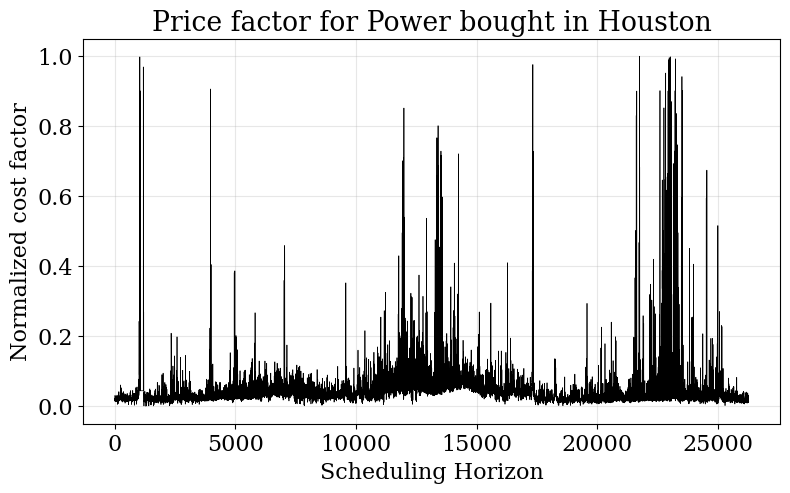

In [19]:

plot_scenario.price_factor(
    scenario=scenario, location=houston, resource=GridPower, fig_size=(9, 5), color='black')


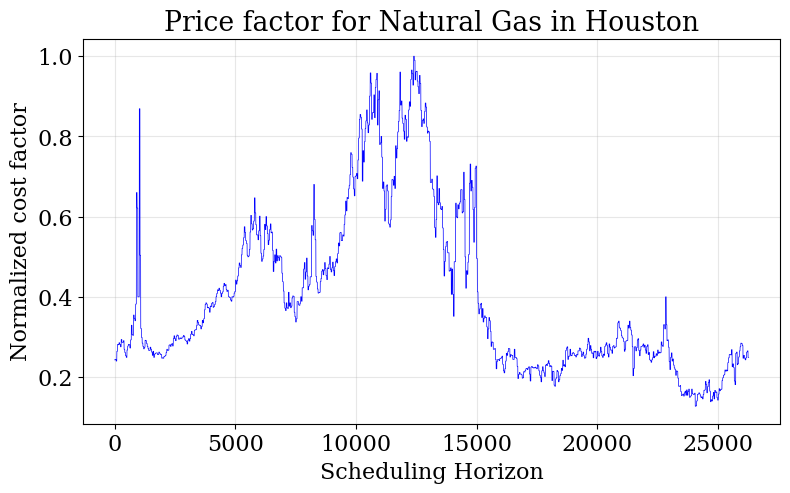

In [20]:
plot_scenario.price_factor(
    scenario=scenario, location=houston, resource=NG, fig_size=(9, 5), color='blue')

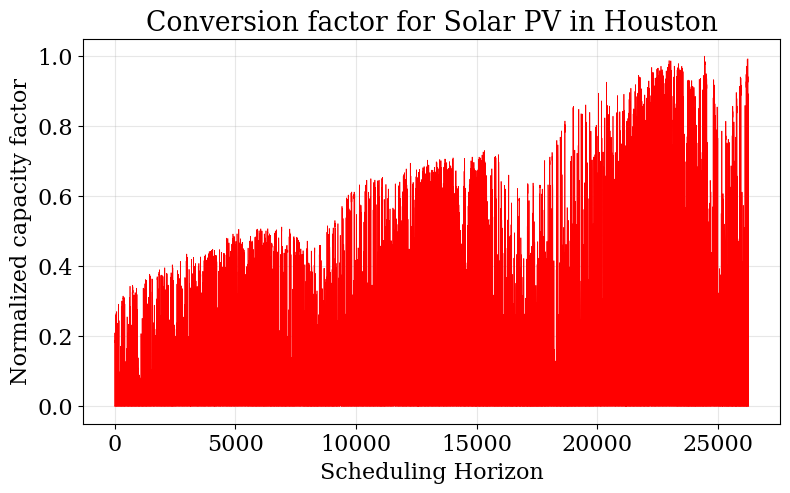

In [21]:
plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=PV, fig_size=(9, 5), color='red')

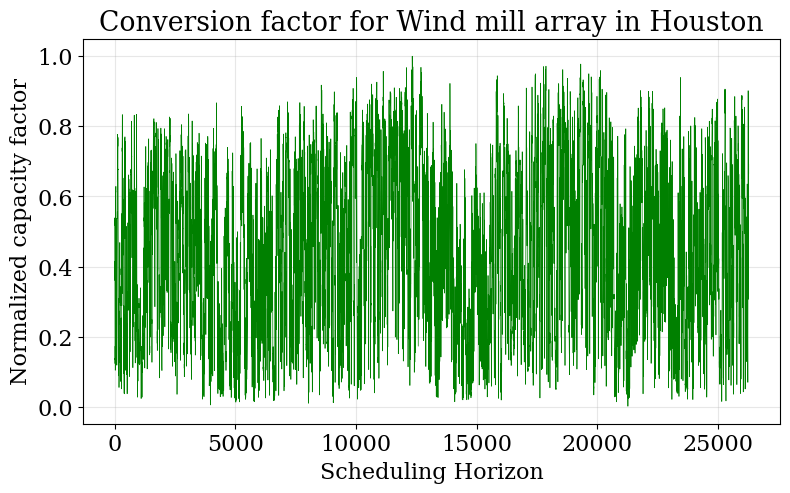

In [22]:
plot_scenario.capacity_factor(
    scenario=scenario, location=houston, process=WF, fig_size=(9, 5), color='green')

In [23]:
#Stop here and revise all your entries

## Formulate MILP

Here we formulate two milps which differ only in their objectives.

For maximizing the discharge of a particular resource, use the objective MAX_DISCHARGE, the objective resource also needs to be specified.

Similarly the discharge can also be minimized using MIN_DISCHARGE. This can be used with a demand for another resource being set. For example, minimizing the discharge of carbon dioxide while meeting a hydrogen demand.

The second MILP, minimized the cost while meeting a varying demand for power

In [24]:
#, Constraints.MODE

milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge


In [ ]:
# # model.component

# from pyomo.environ import ConstraintList
# milp_cost.cons1 = ConstraintList()
# for i in scales.scale_iter(2):
#     milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 5000)

In [ ]:
# # model.component

# from pyomo.environ import ConstraintList

# ramping_limit = 1000

# milp_cost.cons2 = ConstraintList()
# for i in scales.scale_iter(1):
#     if i != (0,0):
#         milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

# milp_cost.cons3 = ConstraintList()
# for i in scales.scale_iter(1):
#     if i != (0,0):
#         milp_cost.cons3.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -ramping_limit)

In [ ]:
from pyomo.environ import Var, Binary

ramping_limit = 1000

milp_cost.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_cost.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons3.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -ramping_limit)

ramping_limitz = 2000

milp_cost.cons4 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons4.add(expr = milp_cost.P['HO', 'ATR_CCS_R', *i] - milp_cost.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limitz)

milp_cost.cons5 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons5.add(expr = milp_cost.P['HO', 'ATR_CCS_R', *i] - milp_cost.P['HO', 'ATR_CCS_R', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -ramping_limitz)

milp_cost.cons6 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons6.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] - milp_cost.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limitz)

milp_cost.cons7 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons7.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] - milp_cost.P['HO', 'ATR_CCS_OC', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -ramping_limitz)        

milp_cost.cons8 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons8.add(expr = milp_cost.P['HO', 'ATR_CCS_R_OC', *i] - milp_cost.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limitz)

milp_cost.cons9 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons9.add(expr = milp_cost.P['HO', 'ATR_CCS_R_OC', *i] - milp_cost.P['HO', 'ATR_CCS_R_OC', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -ramping_limitz)  

    # Minimum production rate
    # milp_cost.cons1 = ConstraintList()
    # for i in scales.scale_iter(1):
    #  milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 1000)

    # Add binary variables for on/off control
milp_cost.on_smr = Var(scales.scale_iter(1), domain=Binary)  # Binary variable for SMR system
milp_cost.on_atr_ccs_r = Var(scales.scale_iter(1), domain=Binary)  # Binary variable for ATR_CCS_R system
milp_cost.on_atr_ccs_oc = Var(scales.scale_iter(1), domain=Binary)  # Binary variable for ATR_CCS_OC system
milp_cost.on_atr_ccs_r_oc = Var(scales.scale_iter(1), domain=Binary)  # Binary variable for ATR_CCS_R_OC system

milp_cost.cons10 = ConstraintList()
for i in scales.scale_iter(1):
    #if i != (0,0):
    milp_cost.cons10.add(expr = milp_cost.P['HO', 'SMR', *i] >= 6000 * milp_cost.on_smr[i]) #30% of max production rate

milp_cost.cons11 = ConstraintList()
for i in scales.scale_iter(1):
    #if i != (0,0):
    milp_cost.cons11.add(expr = milp_cost.P['HO', 'ATR_CCS_R', *i] >= 4000 * milp_cost.on_atr_ccs_r[i]) #20% of max production rate
    
milp_cost.cons12 = ConstraintList()
for i in scales.scale_iter(1):
    #if i != (0,0):
    milp_cost.cons12.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] >= 4000 * milp_cost.on_atr_ccs_oc[i]) #20% of max production rate

milp_cost.cons13 = ConstraintList()
for i in scales.scale_iter(1):
    #if i != (0,0):
    milp_cost.cons13.add(expr = milp_cost.P['HO', 'ATR_CCS_R_OC', *i] >= 4000 * milp_cost.on_atr_ccs_r_oc[i]) #20% of max production rate

    # For SMR
milp_cost.cons14 = ConstraintList()
for i in scales.scale_iter(1):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_smr == 0)
    milp_cost.cons14.add(expr = milp_cost.P['HO', 'SMR', *i] <= 20000 * milp_cost.on_smr[i])

# For ATR_CCS_R
milp_cost.cons15 = ConstraintList()
for i in scales.scale_iter(1):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_r == 0)
    milp_cost.cons15.add(expr = milp_cost.P['HO', 'ATR_CCS_R', *i] <= 20000 * milp_cost.on_atr_ccs_r[i])

# For ATR_CCS_OC
milp_cost.cons16 = ConstraintList()
for i in scales.scale_iter(1):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_oc == 0)
    milp_cost.cons16.add(expr = milp_cost.P['HO', 'ATR_CCS_OC', *i] <= 20000 * milp_cost.on_atr_ccs_oc[i])

# For ATR_CCS_R_OC
milp_cost.cons17 = ConstraintList()
for i in scales.scale_iter(1):
    #if i != (0, 0):
    # Force production to zero if the system is off (on_atr_ccs_r_oc == 0)
    milp_cost.cons17.add(expr = milp_cost.P['HO', 'ATR_CCS_R_OC', *i] <= 20000 * milp_cost.on_atr_ccs_r_oc[i])


In [ ]:
results_cost = solve(scenario=scenario, instance=milp_cost,
                     solver='gurobi', name=f"res_cost", print_solversteps=True, saveformat = '.pkl')


In [ ]:
plot_results.schedule(results = results_cost, y_axis= 'P', component = 'SMR', location='HO')

In [ ]:
results_cost.output['objective']

In [ ]:
results_cost.output['global_warming_potential_location']

In [ ]:
results_cost.output['P']

In [ ]:
milp_gwp = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.MIN_GWP, demand_sign = 'eq')

In [ ]:

from pyomo.environ import ConstraintList

ramping_limit = 1000

milp_gwp.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons2.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons3.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -ramping_limit)

In [ ]:
# # model.component

# from pyomo.environ import ConstraintList
# milp_gwp.cons3 = ConstraintList()
# for i in scales.scale_iter(2):
#     milp_gwp.cons3.add(expr = milp_gwp.P['HO', 'SMRCCS', *i] >= 5)

In [ ]:
results_gwp = solve(scenario=scenario, instance=milp_gwp,
                     solver='gurobi', name=f"res_gwp", print_solversteps=True, saveformat = '.pkl')

In [ ]:
#plot_results.schedule(results = results_gwp, y_axis= 'P', component = 'PEM', location='HO')

In [ ]:
results_gwp.model_summary()

In [ ]:
results_gwp.output['Cost']

In [ ]:
results_gwp.output['objective']

In [ ]:
results_gwp.output['global_warming_potential_resource']

In [ ]:
#results_scope2.output['P_network']

In [ ]:
results_gwp.output['P_network']

In [ ]:
results_gwp.output['P']

In [ ]:
# data = results_gwp.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/ScopeFormulation/mingwpP.xlsx', index=True)

In [ ]:
#, Constraints.MODE

milp_scope1 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.SCOPEONE}, objective=Objective.MIN_ScopeONE_GWP, demand_sign = 'eq')

#, Constraints.SCOPEONE

#, Constraints.EMISSION

In [ ]:
# # model.component

# from pyomo.environ import ConstraintList
# milp_scope1.cons1 = ConstraintList()
# for i in scales.scale_iter(2):
#     milp_scope1.cons1.add(expr = milp_scope1.P['HO', 'SMR', *i] >= 5)

In [ ]:
# model.component

from pyomo.environ import ConstraintList

ramping_limit = 1000

milp_scope1.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_scope1.cons2.add(expr = milp_scope1.P['HO', 'SMR', *i] - milp_scope1.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_scope1.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_scope1.cons3.add(expr = milp_scope1.P['HO', 'SMR', *i] - milp_scope1.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -ramping_limit)

## Optimize to minimize cost

In [ ]:
results_scope1 = solve(scenario=scenario, instance=milp_scope1,
                     solver='gurobi', name=f"res_scope1", print_solversteps=True, saveformat = '.pkl')


In [ ]:
#plot_results.schedule(results = results_scope1, y_axis= 'P', component = 'PEM', location='HO')

In [ ]:
results_scope1.output['P_network']

In [ ]:
results_scope1.output['Cost']

In [ ]:
results_scope1.output['objective']

In [ ]:
results_scope1.output['P']

In [ ]:
# data = results_scope1.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/ScopeFormulation/minscope1.xlsx', index=True)

In [ ]:
#, Constraints.MODE

milp_scope2 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.SCOPETWO}, objective=Objective.MIN_ScopeTWO_GWP, demand_sign = 'eq')

#, Constraints.SCOPEONE

#, Constraints.EMISSION

In [ ]:
# # model.component

# from pyomo.environ import ConstraintList
# milp_scope2.cons1 = ConstraintList()
# for i in scales.scale_iter(2):
#     milp_scope2.cons1.add(expr = milp_scope2.P['HO', 'SMR', *i] >= 5)

In [ ]:
# model.component

from pyomo.environ import ConstraintList

ramping_limit = 1000

milp_scope2.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_scope2.cons2.add(expr = milp_scope2.P['HO', 'SMR', *i] - milp_scope2.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_scope2.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_scope2.cons3.add(expr = milp_scope2.P['HO', 'SMR', *i] - milp_scope2.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] >= -ramping_limit)

In [ ]:
results_scope2 = solve(scenario=scenario, instance=milp_scope2,
                     solver='gurobi', name=f"res_scope2", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_scope2.output['C_network']

In [ ]:
results_scope2.output['global_warming_potential_resource_scope2']

In [ ]:
#plot_results.schedule(results = results_scope2, y_axis= 'P', component = 'PEM', location='HO')

In [ ]:
plot_results.schedule(results = results_scope2, y_axis= 'P', component = 'SMR', location='HO')

In [ ]:
results_scope2.output['P']

In [ ]:
results_scope2.output['P_network']

In [ ]:
results_scope2.output['Cost']

In [ ]:
results_scope2.output['objective']

In [ ]:
# data = results_scope2.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/ScopeFormulation/minscope2.xlsx', index=True)

In [ ]:
results_scope2.output['global_warming_potential_location']

In [ ]:
#, Constraints.MODE

milp_gwp = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.MIN_GWP, demand_sign = 'eq')

#, Constraints.SCOPEONE

#, Constraints.EMISSION

In [ ]:
results_gwp = solve(scenario=scenario, instance=milp_gwp,
                     solver='gurobi', name=f"res_gwp", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp.output['P_network']

In [ ]:
plot_results.schedule(results = results_scope1, y_axis= 'P', component = 'PEM', location='HO')

In [ ]:
results_scope1.output['global_warming_potential_resource_scope1']

In [ ]:
results_scope1.output['P']

In [ ]:

data = results_cost.output['P']

In [ ]:
df = pd.DataFrame(data,index=[0])

In [ ]:
df

In [ ]:
df=df.T

In [ ]:
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mincostprod.xlsx', index=True)

In [ ]:
# data = results_cost.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mincostresource_emission.xlsx', index=True)

In [ ]:
milp_scope1.constraint_inventory_balance.pprint()

In [ ]:
results_scope1.output['objective']

In [ ]:
results_scope1.output['Cost']

In [ ]:
# plot_results.cost(results=results_cost, x=CostX.PROCESS_WISE,
#                   y=CostY.TOTAL, location='HO', fig_size=(11, 6), )
# #plt.rc('xtick', titlesize=8, labelsize=8)
# plt.xticks(fontsize=10, rotation=45, ha='right')

In [ ]:
results_scope1.output['global_warming_potential_location_scope1']

In [ ]:
results_cost.output['P_network']

In [ ]:
results_scope1.output['global_warming_potential_resource_scope1']

In [ ]:
results_scope1.output['global_warming_potential_process']

In [ ]:
milp_gwp = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.MIN_GWP, demand_sign = 'eq')

In [ ]:

from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons1.add(expr = milp_gwp.P['HO', 'PEM', *i] - milp_gwp.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)


In [ ]:

from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons2.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

In [ ]:
# model.component

from pyomo.environ import ConstraintList
milp_gwp.cons3 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp.cons3.add(expr = milp_gwp.P['HO', 'SMRCCS', *i] >= 5)

In [ ]:
milp_gwp.constraint_resource_purchase_varying.pprint()

In [ ]:
results_gwp = solve(scenario=scenario, instance=milp_gwp,
                     solver='gurobi', name=f"res_gwp", print_solversteps=True, saveformat = '.pkl')

In [ ]:
plot_results.schedule(results = results_gwp, y_axis= 'P', component = 'PEM', location='HO')

In [ ]:
results_gwp.output['Cost']

In [ ]:
results_gwp.output['P']

In [ ]:
# data = results_gwp.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod.xlsx', index=True)

In [ ]:
results_cost.output['Cap_P']

In [ ]:
results_gwp.output['Cap_P']

In [ ]:
milp_gwp.constraint_global_warming_potential_resource.pprint()

In [ ]:
scenario.resource_gwp_dict

In [ ]:
results_gwp.output['X_P']

In [ ]:
results_cost.output['X_P']

In [ ]:
results_gwp.output['Cap_P']

In [ ]:
results_cost.output['Cap_P']

In [ ]:
results_gwp.output['Capex_network']

In [ ]:
results_gwp.output['Fopex_network']

In [ ]:
results_gwp.output['Vopex_network']

In [ ]:
results_gwp.output['B_network']

In [ ]:
results_cost.output['B_network']

In [ ]:
results_cost.output['C_network']

In [ ]:
results_cost.output['P']['HO','SMR',0,0]

In [ ]:
print([(key, value) for key, value in results_cost.output['P'].items() if key[1]=='SMR'])

In [ ]:
[results_cost.output['P'][('HO', 'SMR', *i)] for i in scales.scale_iter(2)]

In [ ]:
results_cost.output['C']

In [ ]:
print([(key, value) for key, value in results_cost.output['P'].items() if key[1]=='SMR'])

In [ ]:
results_cost.output['C']

In [ ]:
results_cost.output['P_network']

In [ ]:
results_gwp.output['P_network']

In [ ]:
PEM.conversion[Power]/SMR.conversion[Power]

In [ ]:
SMR.conversion[Power]

In [ ]:
SMRCCS.conversion[Power]

In [ ]:
results_cost.output['Cap_P']

In [ ]:
results_cost.output['S_network']

In [ ]:
results_gwp.output['S_network']

In [ ]:
results_gwp.output['Cost']

In [ ]:
results_gwp.output['X_P']

In [ ]:
results_gwp.output['Cap_P']

In [ ]:
results_cost.output['objective']

In [ ]:
results_gwp.output['objective']

In [ ]:
results_cost.output['global_warming_potential_network']

In [ ]:
results_gwp.output['global_warming_potential_network']

In [ ]:
results_gwp.output['global_warming_potential_resource']

In [ ]:
results_gwp.output['P_network']

In [ ]:
results_cost.output['P_network']

In [ ]:
results_gwp.output

In [ ]:

# plot_results.gwp(results=results_gwp, x=CostX.PROCESS_WISE,
#                   y=CostY.TOTAL, location='HO', fig_size=(11, 6), )
# #plt.rc('xtick', titlesize=8, labelsize=8)
# plt.xticks(fontsize=10, rotation=45, ha='right')

In [ ]:
results_gwp.output['global_warming_potential_location']

In [ ]:
results_gwp.output['P_network']

EMISSION RESTRICTIONS

In [ ]:
milp_gwp_10 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_10, network_scale_level = 0, gwp_reduction_pct = 10, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_10.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons1.add(expr = milp_gwp_10.P['HO', 'PEM', *i] - milp_gwp_10.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons2.add(expr = milp_gwp_10.P['HO', 'SMR', *i] - milp_gwp_10.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons3.add(expr = milp_gwp_10.P['HO', 'SMRCCS', *i] - milp_gwp_10.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_10.cons4.add(expr = milp_gwp_10.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_10 = solve(scenario=scenario, instance=milp_gwp_10,
                     solver='gurobi', name=f"res_gwp_10", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_10.output['objective']

In [ ]:
results_gwp_10.output['global_warming_potential_location']

In [ ]:
results_gwp_10.output['P']

In [ ]:
# data = results_gwp_10.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod10.xlsx', index=True)

In [ ]:
# data = results_gwp_10.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp10resource_emission.xlsx', index=True)

In [ ]:
results_cost.output['global_warming_potential_resource']

In [ ]:
results_gwp_10.output['global_warming_potential_resource']

In [ ]:
milp_gwp_20 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_20, network_scale_level = 0, gwp_reduction_pct = 20, gwp = results_cost.output['global_warming_potential_network'][0])


In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_20.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons1.add(expr = milp_gwp_20.P['HO', 'PEM', *i] - milp_gwp_20.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons2.add(expr = milp_gwp_20.P['HO', 'SMR', *i] - milp_gwp_20.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons3.add(expr = milp_gwp_20.P['HO', 'SMRCCS', *i] - milp_gwp_20.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_20.cons4.add(expr = milp_gwp_20.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_20 = solve(scenario=scenario, instance=milp_gwp_20,
                     solver='gurobi', name=f"res_gwp_20", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_20.output['objective']


In [ ]:
results_gwp_20.output['P']

In [ ]:
results_gwp_20.output['global_warming_potential_location']

In [ ]:
results_gwp_20.output['global_warming_potential_resource']

In [ ]:
results_gwp_20.output['P_network']

In [ ]:
# data = results_gwp_20.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod20.xlsx', index=True)

In [ ]:
# data = results_gwp_20.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp20resource_emission.xlsx', index=True)

In [ ]:
results_gwp_20.output["objective"]

In [ ]:
milp_gwp_30 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_30, network_scale_level = 0, gwp_reduction_pct = 30, gwp = results_cost.output['global_warming_potential_network'][0])





In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_30.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons1.add(expr = milp_gwp_30.P['HO', 'PEM', *i] - milp_gwp_30.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons2.add(expr = milp_gwp_30.P['HO', 'SMR', *i] - milp_gwp_30.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons3.add(expr = milp_gwp_30.P['HO', 'SMRCCS', *i] - milp_gwp_30.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_30.cons4.add(expr = milp_gwp_30.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_30 = solve(scenario=scenario, instance=milp_gwp_30,
                     solver='gurobi', name=f"res_gwp_30", print_solversteps=True, saveformat = '.pkl')

In [ ]:

results_gwp_30.output['objective']

In [ ]:
results_gwp_30.output['P']

In [ ]:
results_gwp_30.output['global_warming_potential_location']

In [ ]:
results_gwp_30.output['P_network']

In [ ]:
plot_results.cost(results=results_gwp_30, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [ ]:
# data = results_gwp_30.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod30.xlsx', index=True)

In [ ]:
results_gwp_30.output["objective"]

In [ ]:
# data = results_gwp_30.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp30resource_emission.xlsx', index=True)

In [ ]:
milp_gwp_40 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_40, network_scale_level = 0, gwp_reduction_pct = 40, gwp = results_cost.output['global_warming_potential_network'][0])


In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_40.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons1.add(expr = milp_gwp_40.P['HO', 'PEM', *i] - milp_gwp_40.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons2.add(expr = milp_gwp_40.P['HO', 'SMR', *i] - milp_gwp_40.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons3.add(expr = milp_gwp_40.P['HO', 'SMRCCS', *i] - milp_gwp_40.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_40.cons4.add(expr = milp_gwp_40.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_40 = solve(scenario=scenario, instance=milp_gwp_40,
                     solver='gurobi', name=f"res_gwp_40", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_40.output['objective']

In [ ]:
results_gwp_40.output['global_warming_potential_location']

In [ ]:
results_gwp_40.output['global_warming_potential_resource']

In [ ]:
results_gwp_40.output['P_network']

In [ ]:
results_gwp_40.output['P']

In [ ]:
plot_results.cost(results=results_gwp_40, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [ ]:
plot_results.schedule(results = results_gwp_40, y_axis= 'P', component = 'SMR', location='HO')
plot_results.schedule(results = results_gwp_40, y_axis= 'P', component = 'SMRCCS', location='HO')


In [ ]:
# data = results_gwp_40.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod40.xlsx', index=True)

In [ ]:
# data = results_gwp_40.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp40resource_emission.xlsx', index=True)

In [ ]:
results_gwp_40.output["objective"]

In [ ]:
milp_gwp_50 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_50, network_scale_level = 0, gwp_reduction_pct = 50, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_50.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons1.add(expr = milp_gwp_50.P['HO', 'PEM', *i] - milp_gwp_50.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons2.add(expr = milp_gwp_50.P['HO', 'SMR', *i] - milp_gwp_50.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons3.add(expr = milp_gwp_50.P['HO', 'SMRCCS', *i] - milp_gwp_50.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_50.cons4.add(expr = milp_gwp_50.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_50 = solve(scenario=scenario, instance=milp_gwp_50,
                     solver='gurobi', name=f"res_gwp_50", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_50.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod50.xlsx', index=True)

In [ ]:
# data = results_gwp_50.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp50resource_emission.xlsx', index=True)

In [ ]:
results_gwp_50.output["objective"]

In [ ]:
results_gwp_50.output['global_warming_potential_location']

In [ ]:
milp_gwp_60 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_60, network_scale_level = 0, gwp_reduction_pct = 60, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_60.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons1.add(expr = milp_gwp_60.P['HO', 'PEM', *i] - milp_gwp_60.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons2.add(expr = milp_gwp_60.P['HO', 'SMR', *i] - milp_gwp_60.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons3.add(expr = milp_gwp_60.P['HO', 'SMRCCS', *i] - milp_gwp_60.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_60.cons4.add(expr = milp_gwp_60.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_60 = solve(scenario=scenario, instance=milp_gwp_60,
                     solver='gurobi', name=f"res_gwp_60", print_solversteps=True, saveformat = '.pkl')

In [ ]:
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'SMR', location='HO')
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'SMRCCS', location='HO')
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'PEM', location='HO')

In [ ]:
# data = results_gwp_60.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod60.xlsx', index=True)

In [ ]:
# data = results_gwp_60.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp60resource_emission.xlsx', index=True)

In [ ]:
results_gwp_60.output["objective"]

In [ ]:
results_gwp_60.output["P"]

In [ ]:
results_gwp_60.output['global_warming_potential_location']

In [ ]:
results_gwp_60.output['global_warming_potential_resource']

In [ ]:
milp_gwp_70 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_70, network_scale_level = 0, gwp_reduction_pct = 70, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_70.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons1.add(expr = milp_gwp_70.P['HO', 'PEM', *i] - milp_gwp_70.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons2.add(expr = milp_gwp_70.P['HO', 'SMR', *i] - milp_gwp_70.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons3.add(expr = milp_gwp_70.P['HO', 'SMRCCS', *i] - milp_gwp_70.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_70.cons4.add(expr = milp_gwp_70.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_70 = solve(scenario=scenario, instance=milp_gwp_70,
                     solver='gurobi', name=f"res_gwp_70", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_70.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod70.xlsx', index=True)

In [ ]:
# data = results_gwp_70.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp70resource_emission.xlsx', index=True)

In [ ]:
results_gwp_70.output["objective"]

In [ ]:
results_gwp_70.output['global_warming_potential_resource']

In [ ]:
results_gwp_70.output["P"]

In [ ]:
results_gwp_70.output['global_warming_potential_location']

In [ ]:
milp_gwp_75 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_75, network_scale_level = 0, gwp_reduction_pct = 75, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_75.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons1.add(expr = milp_gwp_75.P['HO', 'PEM', *i] - milp_gwp_75.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons2.add(expr = milp_gwp_75.P['HO', 'SMR', *i] - milp_gwp_75.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons3.add(expr = milp_gwp_75.P['HO', 'SMRCCS', *i] - milp_gwp_75.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_75.cons4.add(expr = milp_gwp_75.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_75 = solve(scenario=scenario, instance=milp_gwp_75,
                     solver='gurobi', name=f"res_gwp_75", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_75.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod75.xlsx', index=True)

In [ ]:
results_gwp_75.output["objective"]

In [ ]:
results_gwp_75.output["P"]

In [ ]:
results_gwp_75.output['global_warming_potential_location']

In [ ]:
milp_gwp_78 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_78, network_scale_level = 0, gwp_reduction_pct = 78, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_78.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons1.add(expr = milp_gwp_78.P['HO', 'PEM', *i] - milp_gwp_78.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons2.add(expr = milp_gwp_78.P['HO', 'SMR', *i] - milp_gwp_78.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons3.add(expr = milp_gwp_78.P['HO', 'SMRCCS', *i] - milp_gwp_78.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_78.cons4.add(expr = milp_gwp_78.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_78 = solve(scenario=scenario, instance=milp_gwp_78,
                     solver='gurobi', name=f"res_gwp_78", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_78.output['objective']

In [ ]:
results_gwp_78.output['global_warming_potential_location']

In [ ]:
results_gwp_78.output["P"]

In [ ]:
# data = results_gwp_78.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod78.xlsx', index=True)

In [ ]:
plot_results.cost(results=results_gwp_78, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [ ]:
milp_gwp_79 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_79, network_scale_level = 0, gwp_reduction_pct = 79, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_79.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons1.add(expr = milp_gwp_79.P['HO', 'PEM', *i] - milp_gwp_79.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons2.add(expr = milp_gwp_79.P['HO', 'SMR', *i] - milp_gwp_79.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons3.add(expr = milp_gwp_79.P['HO', 'SMRCCS', *i] - milp_gwp_79.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_79.cons4.add(expr = milp_gwp_79.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_79 = solve(scenario=scenario, instance=milp_gwp_79,
                     solver='gurobi', name=f"res_gwp_79", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_79.output['objective']

In [ ]:
results_gwp_79.output['global_warming_potential_location']

In [ ]:
results_gwp_79.output['P']

In [ ]:
milp_gwp_85 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_85, network_scale_level = 0, gwp_reduction_pct = 85, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_85.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons1.add(expr = milp_gwp_85.P['HO', 'PEM', *i] - milp_gwp_85.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons2.add(expr = milp_gwp_85.P['HO', 'SMR', *i] - milp_gwp_85.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons3.add(expr = milp_gwp_85.P['HO', 'SMRCCS', *i] - milp_gwp_85.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_85.cons4.add(expr = milp_gwp_85.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_85 = solve(scenario=scenario, instance=milp_gwp_85,
                     solver='gurobi', name=f"res_gwp_85", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_85.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod85.xlsx', index=True)

In [ ]:
results_gwp_85.output['objective']

In [ ]:
results_gwp_85.output['global_warming_potential_location']

In [ ]:
results_gwp_85.output['P']

In [ ]:
milp_gwp_80 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_80, network_scale_level = 0, gwp_reduction_pct = 80, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_80.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons1.add(expr = milp_gwp_80.P['HO', 'PEM', *i] - milp_gwp_80.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons2.add(expr = milp_gwp_80.P['HO', 'SMR', *i] - milp_gwp_80.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons3.add(expr = milp_gwp_80.P['HO', 'SMRCCS', *i] - milp_gwp_80.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_80.cons4.add(expr = milp_gwp_80.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_80 = solve(scenario=scenario, instance=milp_gwp_80,
                     solver='gurobi', name=f"res_gwp_80", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_80.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod80.xlsx', index=True)

In [ ]:
# data = results_gwp_80.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp80resource_emission.xlsx', index=True)

In [ ]:
results_gwp_80.output['objective']

In [ ]:
results_gwp_80.output['global_warming_potential_location']

In [ ]:
milp_gwp_90 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_90, network_scale_level = 0, gwp_reduction_pct = 90, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_90.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons1.add(expr = milp_gwp_90.P['HO', 'PEM', *i] - milp_gwp_90.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons2.add(expr = milp_gwp_90.P['HO', 'SMR', *i] - milp_gwp_90.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons3.add(expr = milp_gwp_90.P['HO', 'SMRCCS', *i] - milp_gwp_90.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_90.cons4.add(expr = milp_gwp_90.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_90 = solve(scenario=scenario, instance=milp_gwp_90,
                     solver='gurobi', name=f"res_gwp_90", print_solversteps=True, saveformat = '.pkl')

In [ ]:
# data = results_gwp_90.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod90.xlsx', index=True)

In [ ]:
# data = results_gwp_90.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp90resource_emission.xlsx', index=True)

In [ ]:
results_gwp_90.output['objective']

In [ ]:
results_gwp_90.output['global_warming_potential_location']

In [ ]:
results_gwp_90.output['P']

In [ ]:
milp_gwp_92 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_92, network_scale_level = 0, gwp_reduction_pct = 92, gwp = results_cost.output['global_warming_potential_network'][0])

In [ ]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_92.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons1.add(expr = milp_gwp_92.P['HO', 'PEM', *i] - milp_gwp_92.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons2.add(expr = milp_gwp_92.P['HO', 'SMR', *i] - milp_gwp_92.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons3.add(expr = milp_gwp_92.P['HO', 'SMRCCS', *i] - milp_gwp_92.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_92.cons4.add(expr = milp_gwp_92.P['HO', 'SMR', *i] >= 5)

In [ ]:
results_gwp_92 = solve(scenario=scenario, instance=milp_gwp_92,
                     solver='gurobi', name=f"res_gwp_92", print_solversteps=True, saveformat = '.pkl')

In [ ]:
results_gwp_92.output['objective']

In [ ]:
results_gwp_92.output['global_warming_potential_location']

In [ ]:
results_gwp_92.output['P']

In [ ]:
# data = results_gwp_92.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod92.xlsx', index=True)